<h1>Machine Learning</h1>
<p><b>Author:</b> jecs89 </p>
<p><b>Date:</b> 31-05-2022 </p>
<p><b>Session:</b> 03 </p>
<p><b>Country:</b> Ecuador </p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<h2> Multilayer Perceptron </h2>

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples = 100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
print( clf.predict_proba(X_test[:1]) )
# array([[0.038..., 0.961...]])
print( clf.predict(X_test[:5, :]) )
# # array([1, 0, 1, 0, 1])
print( clf.score(X_test, y_test) )

[[0.00319755 0.99680245]]
[1 0 1 1 1]
1.0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


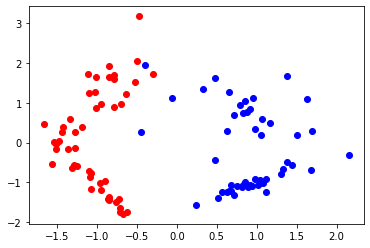

In [3]:
for i in range(X.shape[0]):
  if y[i] == 0:
    plt.scatter( X[i,0], X[i,1], c='r' )
  elif y[i] == 1:
    plt.scatter( X[i,0], X[i,1], c='b' )
plt.show()

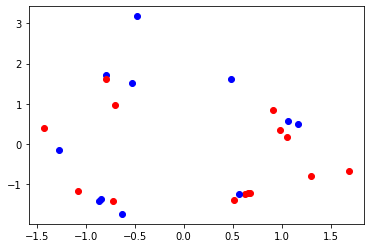

In [4]:
for i in range(X_test.shape[0]):
  if y[i] == 0:
    plt.scatter( X_test[i,0], X_test[i,1], c='r' )
  elif y[i] == 1:
    plt.scatter( X_test[i,0], X_test[i,1], c='b' )
plt.show()

<h2> Income Classification in Ecuador </h2>

In [5]:
#https://www.kaggle.com/datasets/lodetomasi1995/income-classification?select=income_evaluation.csv
df = pd.read_csv('income_evaluation.csv')

In [6]:
df.shape

(32561, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

In [10]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [11]:
X = df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']]

In [12]:
y = df['income']

In [13]:
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [17]:
print( clf.score(X_test, y_test) )

0.792531630020882


In [20]:
y_pred = clf.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(y_test.value_counts())
print(cf_matrix)

 <=50K    6181
 >50K     1960
Name: income, dtype: int64
[[6043  138]
 [1551  409]]


In [30]:
import seaborn as sns
import numpy as np

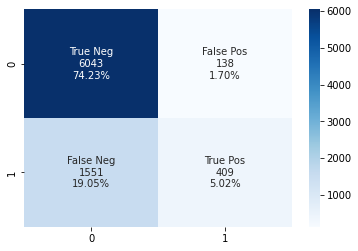

In [31]:
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')